# Introduction

This is a data analysis project focused on the modern Olympic Games, from Athens 1896 to Rio 2016. Each row consists of an individual athlete competing in an Olympic event for a specific country and which medal was won (if any). I want to explore the dataset to determine which year and city the Netherlands won the highest number of medals in their history. I will also create a plot visualizing the relationship between the number of athletes countries send to an event and the number of medals they receive. The libraries used in this notebook include pandas for data reading, cleaning and preparation; MatPlotlib and seaborn for data visualisation. 

# 1. Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [13]:
athlete_events= pd.read_csv("Desktop/athlete_events.csv")
print(athlete_events)

            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1          

# Data Information

The olympics dataset is a historical dataset which contains 271116 rows and 15 columns of information regarding olympic athletes with respect to country, age, height, wieght, year, event, sport, medals and other variables.

### Data Dictionary

Each column has a unique meaning. Find detailed explanations for each column below;

id	Unique number for each athlete
name	Athlete's name
sex	M or F
age	Age of the athlete
height	In centimeters
weight	In kilograms
team	Team name
noc	National Olympic Committee 3
games	Year and season
year	Integer
season	Summer or Winter
city	Host city
sport	Sport
event	Event
medal	Gold, Silver, Bronze, or NA

In [3]:
athlete_events.shape

(271116, 15)

In [4]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
athlete_events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# 2. Data Preparation and Data Cleaning

The dataset contains a lot of information. Data cleaning was implemented to prepare the data for analysis.

### Checking for columns with missing values

In [7]:
#Let's identify all columns with null values
athlete_events.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

From the above dataset we can see that the columns of height, weight and medal have null values. The medal column has the highest number of null values with 231333 rows out of 271116 rows of dataset. The null values of the medal column will remain as such because only those who are the top three winners get a medal. This means not all athletes will get a medal, therefore some athletes will win no medal. The values of the age, weight and height will also not affect my analysis.

### Removing duplicate rows

In [8]:
#Drop duplicate rows in this dataset
athlete_events.drop_duplicates(inplace=True)

In this case, I removed all duplicate values because duplicated rows can impact our analysis.

In [9]:
print(athlete_events)

            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1          

# 3. Exploring Data

### In which year and city did the Netherlands win the highest number of medals in their history?

To create a dataframe of team Netherlands, the dataset was filtered to contain only rows with information on the Netherlands team based on year, city and medal.

In [16]:
#Create a subset of the Netherlands team that includes only specific columns
netherlands_team = athlete_events.loc[(athlete_events["Team"] == "Netherlands"), ["Year", "City", "Medal"]]
print(netherlands_team)

        Year         City   Medal
4       1988      Calgary     NaN
5       1988      Calgary     NaN
6       1992  Albertville     NaN
7       1992  Albertville     NaN
8       1994  Lillehammer     NaN
...      ...          ...     ...
271047  1988        Seoul     NaN
271048  1992    Barcelona  Bronze
271049  1996      Atlanta    Gold
271050  1998       Nagano     NaN
271051  1998       Nagano     NaN

[5718 rows x 3 columns]


We want to determine the number of medals the Netherlands team won. Lets remove rows where they have no medal and subset for rows where they at least won a medal.

In [18]:
#create a subset that contains data where athletes from Netherlands won at least a medal
netherlands_medal = netherlands_team[(netherlands_team["Medal"] == "Gold") | (netherlands_team["Medal"] == "Silver") | (netherlands_team["Medal"] == "Bronze")]
print(netherlands_medal)

        Year            City   Medal
91      1988           Seoul  Bronze
92      1996         Atlanta  Silver
1227    2012          London  Bronze
1228    2016  Rio de Janeiro  Silver
2099    2008         Beijing    Gold
...      ...             ...     ...
271015  1992       Barcelona  Silver
271016  1996         Atlanta    Gold
271032  1996         Atlanta  Bronze
271048  1992       Barcelona  Bronze
271049  1996         Atlanta    Gold

[988 rows x 3 columns]


To find the highest number of medals team Netherlands won based on year and city, We need to first collect information on the number of medals won per year in each city.

In [20]:
#create a dataframe of the number of medals with respect to year and city
nb_medals = netherlands_medal.groupby(["Year", "City"])["Medal"].value_counts()
print(nb_medals)

Year  City            Medal 
1900  Paris           Bronze     6
1906  Athina          Bronze     5
                      Silver     1
1908  London          Bronze    12
1912  Stockholm       Bronze    26
                                ..
2014  Sochi           Bronze     9
                      Silver     7
2016  Rio de Janeiro  Silver    25
                      Bronze    11
                      Gold       9
Name: Medal, Length: 105, dtype: int64


In [19]:
#view the total number of medals for each city based on the year
total_nb_medals = netherlands_medal.groupby(["Year", "City"])["Medal"].count()
print(total_nb_medals)

Year  City          
1900  Paris              6
1906  Athina             6
1908  London            12
1912  Stockholm         26
1920  Antwerpen         42
1924  Paris             24
1928  Amsterdam         51
1932  Los Angeles       13
1936  Berlin            34
1948  London            40
1952  Helsinki          18
      Oslo               3
1960  Roma               3
      Squaw Valley       2
1964  Innsbruck          2
      Tokyo             31
1968  Grenoble           9
      Mexico City       14
1972  Munich             6
      Sapporo            9
1976  Innsbruck          6
      Montreal          14
1980  Lake Placid        4
      Moskva             6
1984  Los Angeles       41
1988  Calgary            7
      Seoul             45
1992  Albertville        4
      Barcelona         33
1994  Lillehammer        4
1996  Atlanta           73
1998  Nagano            11
2000  Sydney            79
2002  Salt Lake City     8
2004  Athina            77
2006  Torino            13
2008  B

In [21]:
#sort the values from the highest to lowest number of medals won, grouped by year and city
total_nb_medals.sort_values(ascending=False)

Year  City          
2000  Sydney            79
2004  Athina            77
1996  Atlanta           73
2012  London            69
2008  Beijing           58
1928  Amsterdam         51
1988  Seoul             45
2016  Rio de Janeiro    45
1920  Antwerpen         42
1984  Los Angeles       41
1948  London            40
1936  Berlin            34
1992  Barcelona         33
1964  Tokyo             31
2014  Sochi             29
1912  Stockholm         26
1924  Paris             24
1952  Helsinki          18
1968  Mexico City       14
1976  Montreal          14
1932  Los Angeles       13
2006  Torino            13
1908  London            12
2010  Vancouver         11
1998  Nagano            11
1968  Grenoble           9
1972  Sapporo            9
2002  Salt Lake City     8
1988  Calgary            7
1900  Paris              6
1980  Moskva             6
1906  Athina             6
1972  Munich             6
1976  Innsbruck          6
1994  Lillehammer        4
1992  Albertville        4
1980  L

### From the observation above, we can see that the Netherlands team won the highest number of medals in Sydney in the year 2000 with 79 medals in total. Therefore, in the history of the netherlands they won their highest number of medals in Sydney in the year 2000.

# 4. Data Visualization

### Visualizing the relationship between the number of athletes countries send to an event and the number of medals they receive

Here, we are going to create a plot that shows the relationship between the number of athletes per event for each country and the number of medals won per event for each country


Let's determine the number of athletes with respect to events for each country


In [22]:
#group the dataframe by team and event and count the athletes
athlete_per_event = athlete_events.groupby(["Team", "Event"])["Name"].value_counts()
print(athlete_per_event)

Team                   Event                              Name                                                
30. Februar            Sailing Mixed Two Person Keelboat  Harald Fereberger                                       1
                                                          Harald von Musil                                        1
A North American Team  Polo Men's Polo                    Jos Eustaquio Luis Francisco Escandn y Barrn            1
                                                          Jos Manuel Mara del Corazn de Jess Escandn y Barrn      1
                                                          Jos Pablo Eustaquio Manuel Francisco Escandn y Barrn    1
                                                                                                                 ..
rn-2                   Sailing Mixed 8 metres             Axel Gustaf Estlander                                   1
                                                          Bertel Jusln       

In [23]:
#print out the total number of athletes based on event per country
total_nb_athlete_per_event = athlete_events.groupby(["Team", "Event"])["Name"].count()
print(total_nb_athlete_per_event)

Team                   Event                              
30. Februar            Sailing Mixed Two Person Keelboat      2
A North American Team  Polo Men's Polo                        4
Acipactli              Sailing Mixed Three Person Keelboat    3
Acturus                Sailing Mixed Two Person Keelboat      2
Afghanistan            Athletics Men's 100 metres             7
                                                             ..
Zimbabwe               Tennis Women's Singles                 4
                       Triathlon Men's Olympic Distance       3
                       Weightlifting Men's Heavyweight I      1
Zut                    Sailing Mixed 6 metres                 3
rn-2                   Sailing Mixed 8 metres                 5
Name: Name, Length: 29619, dtype: int64


Lets determine the number of medals athletes recieve for each event based on their country

In [24]:
#group the dataframe by team and event and count the number of medals athletes won for their team at each event
medals_per_event = athlete_events.groupby(["Team", "Event"])["Medal"].value_counts()
print(medals_per_event)

Team                   Event                                          Medal 
A North American Team  Polo Men's Polo                                Bronze    4
Afghanistan            Taekwondo Men's Featherweight                  Bronze    1
                       Taekwondo Men's Flyweight                      Bronze    1
Algeria                Athletics Men's 1,500 metres                   Gold      2
                                                                      Silver    1
                                                                               ..
Zimbabwe               Swimming Women's 200 metres Backstroke         Gold      2
                       Swimming Women's 200 metres Individual Medley  Bronze    1
                                                                      Silver    1
                       Swimming Women's 400 metres Individual Medley  Silver    1
Zut                    Sailing Mixed 6 metres                         Silver    3
Name: Medal, Length: 

In [25]:
#print out the total number of medals for each event
total_medals_per_event = athlete_events.groupby(["Team", "Event"])["Medal"].count()
print(total_medals_per_event)

Team                   Event                              
30. Februar            Sailing Mixed Two Person Keelboat      0
A North American Team  Polo Men's Polo                        4
Acipactli              Sailing Mixed Three Person Keelboat    0
Acturus                Sailing Mixed Two Person Keelboat      0
Afghanistan            Athletics Men's 100 metres             0
                                                             ..
Zimbabwe               Tennis Women's Singles                 0
                       Triathlon Men's Olympic Distance       0
                       Weightlifting Men's Heavyweight I      0
Zut                    Sailing Mixed 6 metres                 3
rn-2                   Sailing Mixed 8 metres                 0
Name: Medal, Length: 29619, dtype: int64


In [26]:
#create a dataframe showing the events countries participated in
event_by_country= athlete_events.loc[:, ["Team", "Event"]]
print(event_by_country)

                  Team                                     Event
0                China               Basketball Men's Basketball
1                China              Judo Men's Extra-Lightweight
2              Denmark                   Football Men's Football
3       Denmark/Sweden               Tug-Of-War Men's Tug-Of-War
4          Netherlands          Speed Skating Women's 500 metres
...                ...                                       ...
271111        Poland-1                Luge Mixed (Men)'s Doubles
271112          Poland  Ski Jumping Men's Large Hill, Individual
271113          Poland        Ski Jumping Men's Large Hill, Team
271114          Poland                      Bobsleigh Men's Four
271115          Poland                      Bobsleigh Men's Four

[271116 rows x 2 columns]


In [27]:
#create a new column for the count values of the number of athletes per event
event_by_country["number_of_athletes"] = athlete_events.groupby(["Team", "Event"])["Name"].transform("count")
print(event_by_country)


                  Team                                     Event  \
0                China               Basketball Men's Basketball   
1                China              Judo Men's Extra-Lightweight   
2              Denmark                   Football Men's Football   
3       Denmark/Sweden               Tug-Of-War Men's Tug-Of-War   
4          Netherlands          Speed Skating Women's 500 metres   
...                ...                                       ...   
271111        Poland-1                Luge Mixed (Men)'s Doubles   
271112          Poland  Ski Jumping Men's Large Hill, Individual   
271113          Poland        Ski Jumping Men's Large Hill, Team   
271114          Poland                      Bobsleigh Men's Four   
271115          Poland                      Bobsleigh Men's Four   

        number_of_athletes  
0                      130  
1                        6  
2                      136  
3                        6  
4                       39  
...      

In [28]:
#create a new column for the count values of the number of medals won 
event_by_country["number_of_medals"] = athlete_events.groupby(["Team", "Event"])["Medal"].transform("count")
print(event_by_country)


                  Team                                     Event  \
0                China               Basketball Men's Basketball   
1                China              Judo Men's Extra-Lightweight   
2              Denmark                   Football Men's Football   
3       Denmark/Sweden               Tug-Of-War Men's Tug-Of-War   
4          Netherlands          Speed Skating Women's 500 metres   
...                ...                                       ...   
271111        Poland-1                Luge Mixed (Men)'s Doubles   
271112          Poland  Ski Jumping Men's Large Hill, Individual   
271113          Poland        Ski Jumping Men's Large Hill, Team   
271114          Poland                      Bobsleigh Men's Four   
271115          Poland                      Bobsleigh Men's Four   

        number_of_athletes  number_of_medals  
0                      130                 0  
1                        6                 0  
2                      136                

To visualise the relationship between the number of athletes and number of medals for each country we use seaborn to plot the data

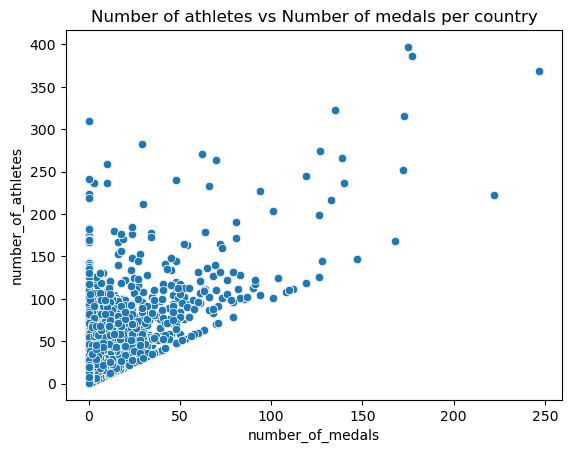

In [29]:
#create a scatterplot showing the number of medals and number of athletes
import seaborn as sns
sns.scatterplot(x="number_of_medals", y="number_of_athletes", data=event_by_country)
plt.title("Number of athletes vs Number of medals per country")
plt.show()

### The data points cluster in the lower left corner, indicating that most countries send relatively few athletes and win few medals. However, as the number of athletes increases, the number of medals also tends to rise. This suggests a positive relationship between team size and medal count across countries. 